# Data Analysis 1

### Ann Maria John, Madhulika Dutta, Priyanka Bhyregowda, Shruti Badrinarayanan

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Dataset Overview**

The dataset in question contains information on individuals' responses to a series of questions related to depression and sleep apnea, along with demographic information. Here's a brief overview of some of the columns:

* **SEQN:** Respondent sequence number, a unique identifier for each participant.

* **Questions related to feelings of depression:**
    * Little interest in doing things
    * Feeling down or depressed
    * Trouble sleeping or sleeping too much
    * Feeling tired or having little energy
    * Poor appetite or overeating
    * Feeling bad about yourself
    * Trouble concentrating on things
    * Moving or speaking slowly or too fast
    * Thought you would be better off dead

* **Questions related to Sleep Apnea:**
    * No of hours of sleep
    * How often an individual snores
    * How often an individual snorts/stops breathing
    * Trouble sleeping

* **Questions related to Hypertension:**
    * Taking medication for High Blood Pressure (HBP)
    * Blood Pressure

* **Demographic and lifestyle information:**
    * Gender
    * Age
    * Race
    * Education Level
    * Marital Status
    * Pregnant (yes/no)
    * PIR (Poverty Income Ratio)
    * current_drinker
    * past_drinker
    * current_smoker
    * past_smoker


In [3]:
%cd /content/drive/Shareddrives/'DATA240 - Data Mining'/

/content/drive/Shareddrives/DATA240 - Data Mining


In [2]:
pwd

'/content'

In [4]:
import pandas as pd

# Read Data
data = pd.read_csv("Data Preprocessing/preprocessed_data.csv")

# Print first few records
data.head()

,Little_interest_in_doing_things,Feeling_down_or_depressed,Trouble_sleeping_or_sleeping_too_much,Feeling_tired_or_having_little_energy,Poor_appetite_or_overeating,Feeling_bad_about_yourself,Trouble_concentrating_on_things,Moving_or_speaking_slowly_or_too_fast,Thought_you_would_be_better_off_dead,No_of_hours_you_sleep,...,current_smoker,past_smoker,Gender,Age,Race,Education_Level,Marital_Status,Pregnant,PIR,depression_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0,0,2,85,Non-Hispanic White,Some College/AA degree,Divorced/Widowed/Separated,0.0,1.99,No Depression
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,0,0,2,44,Non-Hispanic White,Some College/AA degree,Married/Living with Partner,0.0,4.65,No Depression
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0,0,1,70,Non-Hispanic White,> College Graduate,Married/Living with Partner,0.0,5.00,No Depression
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0,0,1,73,Non-Hispanic White,High School Graduate,Married/Living with Partner,0.0,2.15,No Depression
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0,0,1,21,Non-Hispanic White,High School Graduate,Never Married,0.0,0.46,No Depression


In [5]:
data.columns

Index(['Little_interest_in_doing_things', 'Feeling_down_or_depressed',
       'Trouble_sleeping_or_sleeping_too_much',
       'Feeling_tired_or_having_little_energy', 'Poor_appetite_or_overeating',
       'Feeling_bad_about_yourself', 'Trouble_concentrating_on_things',
       'Moving_or_speaking_slowly_or_too_fast',
       'Thought_you_would_be_better_off_dead', 'No_of_hours_you_sleep',
       'How_often_do_you_snore', 'How_often_do_you_snort/stop_breathing',
       'trouble_sleeping', 'Sleep_Apnea', 'Blood_pressure',
       'Taking_Medication_for_HBP', 'current_drinker', 'past_drinker',
       'current_smoker', 'past_smoker', 'Gender', 'Age', 'Race',
       'Education_Level', 'Marital_Status', 'Pregnant', 'PIR',
       'depression_category'],
      dtype='object')

In [ ]:
data['Little_interest_in_doing_things'].value_counts()

Little_interest_in_doing_things
0.0    18819
1.0     3499
2.0     1025
3.0      765
Name: count, dtype: int64

## 1. Summary Statistics and Distribution of Key Variables

We will generate summary statistics to understand the central tendencies, dispersion, and shape of the dataset's distributions. This step will help identify any immediate patterns or areas that require a deeper dive, especially focusing on the relationship between sleep apnea, hypertension, and depression categories.

In [7]:
# Generate summary statistics for the dataset
summary_stats = data.describe(include='all')

# For categorical variables, let's see the frequency of categories
categorical_columns = ['Sleep_Apnea', 'Taking_Medication_for_HBP', 'current_drinker', 'past_drinker',
                       'current_smoker', 'past_smoker', 'Gender', 'Race', 'Education_Level',
                       'Marital_Status', 'depression_category']
category_frequencies = data[categorical_columns].astype('category').describe().transpose()

### Summary Statistics Overview
The dataset comprises 24,108 observations, with a wide range of variables covering depression symptoms, sleep issues, hypertension, and demographic characteristics. Here's a brief summary of key findings:

* Depression Symptoms: Symptoms like "Little_interest_in_doing_things" and "Feeling_down_or_depressed" have means of 0.34 and 0.32 respectively, suggesting that a significant number of respondents reported experiencing these symptoms, albeit at a lower intensity on average.
* Sleep Issues: On average, respondents reported "Trouble_sleeping_or_sleeping_too_much" with a mean score of 0.57, indicating that sleep-related issues are somewhat prevalent.
* Hypertension: A significant portion of the dataset reports taking medication for high blood pressure (HBP), with the most common response being '1', indicating that they are on medication.
* Demographics: The dataset includes a diverse set of participants, with "Non-Hispanic White" being the most common race and "Married/Living with Partner" being the most common marital status. Gender is almost evenly split, and the majority of respondents have an education level of '3'.

In [8]:
summary_stats

,Little_interest_in_doing_things,Feeling_down_or_depressed,Trouble_sleeping_or_sleeping_too_much,Feeling_tired_or_having_little_energy,Poor_appetite_or_overeating,Feeling_bad_about_yourself,Trouble_concentrating_on_things,Moving_or_speaking_slowly_or_too_fast,Thought_you_would_be_better_off_dead,No_of_hours_you_sleep,...,current_smoker,past_smoker,Gender,Age,Race,Education_Level,Marital_Status,Pregnant,PIR,depression_category
count,24108.000000,24108.000000,24108.000000,24108.000000,24108.000000,24108.000000,24108.000000,24108.000000,24108.000000,24108.000000,...,24108.000000,24108.000000,24108.000000,24108.000000,24108,24108,24108,24108.000000,24108.000000,24108
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4,5,3,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Non-Hispanic White,Some College/AA degree,Married/Living with Partner,NaN,NaN,No Depression
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,17277,7153,14477,NaN,NaN,18655
mean,0.325369,0.317654,0.564792,0.686950,0.342252,0.220051,0.229384,0.142028,0.048449,7.244587,...,0.198399,0.241745,1.516219,49.956819,NaN,NaN,NaN,0.021984,2.523254,NaN
std,0.703528,0.682932,0.913567,0.910579,0.740731,0.597822,0.623761,0.497961,0.287703,1.485624,...,0.398802,0.428150,0.499747,17.924164,NaN,NaN,NaN,0.146636,1.531113,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,1.000000,20.000000,NaN,NaN,NaN,0.000000,0.000000,NaN
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,1.000000,34.000000,NaN,NaN,NaN,0.000000,1.250000,NaN
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,...,0.000000,0.000000,2.000000,50.000000,NaN,NaN,NaN,0.000000,2.150000,NaN
75%,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,...,0.000000,0.000000,2.000000,64.000000,NaN,NaN,NaN,0.000000,3.830000,NaN


### Categorical Variables Frequency
* Sleep Apnea and Hypertension: The majority of respondents reported not having sleep apnea (21,754 out of 24,108), and a majority are taking medication for high blood pressure (23,163 out of 24,108), which suggests a potential area of interest in exploring the relationship between hypertension and sleep apnea.
* Lifestyle Factors: Most respondents are not current drinkers or smokers, which provides an interesting perspective on lifestyle factors that could be associated with depression, sleep apnea, and hypertension.

In [9]:
category_frequencies

,count,unique,top,freq
Sleep_Apnea,24108.0,2.0,0.0,21754.0
Taking_Medication_for_HBP,24108.0,2.0,1.0,23163.0
current_drinker,24108.0,2.0,0.0,14175.0
past_drinker,24108.0,2.0,0.0,21924.0
current_smoker,24108,2,0,19325
past_smoker,24108,2,0,18280
Gender,24108,2,2,12445
Race,24108,4,Non-Hispanic White,17277
Education_Level,24108,5,Some College/AA degree,7153
Marital_Status,24108,3,Married/Living with Partner,14477


## 2. Correlation

To visually assess the strength and direction of relationships between variables, especially focusing on depression, sleep issues, and hypertension indicators.

In [10]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Encode the 'depression_category' column
data['depression_category_encoded'] = label_encoder.fit_transform(data['depression_category'])

# Calculate the correlation matrix again, this time including the encoded 'depression_category'
correlation_matrix = data.corr()

# Extract correlations related to 'depression_category_encoded', 'Sleep_Apnea', and 'Blood_pressure'
relevant_correlations = correlation_matrix[['depression_category_encoded', 'Sleep_Apnea', 'Blood_pressure']].loc[['depression_category_encoded', 'Sleep_Apnea', 'Blood_pressure']]

relevant_correlations

ValueError: could not convert string to float: 'Non-Hispanic White'

#### Correlation Heatmap: This will provide a visual representation of the correlation matrix, making it easier to identify which variables are most strongly related.

The correlation heatmap provides a visual summary of the relationships between depression, sleep apnea, hypertension (blood pressure), and sleep duration. Key observations include:

* Depression and Sleep Apnea: There's a modest positive correlation (0.10) between sleep apnea and the depression category, suggesting that individuals with sleep apnea might have slightly higher depression scores.
* Sleep Apnea and Blood Pressure: The correlation between sleep apnea and blood pressure is very low (0.01), suggesting little to no direct relationship between these two variables in this dataset.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation Heatmap for relevant variables
plt.figure(figsize=(5, 5))
sns.heatmap(relevant_correlations, annot=True, cmap="coolwarm", fmt=".4f")
plt.title("Correlation Heatmap of Depression, Sleep Apnea, and Hypertension Variables\n")
plt.show()

NameError: name 'relevant_correlations' is not defined

<Figure size 500x500 with 0 Axes>

#### The full correlation heatmap for the entire dataset showcases the relationships between all variables, including those related to depression symptoms, sleep apnea, hypertension, and demographic characteristics.

Here are some insights that can be drawn from this visualization:

* Clustered Variables: There are clusters of variables that show higher correlations with each other, particularly among the depression symptoms (e.g., feeling down, trouble sleeping, feeling tired). This suggests a co-occurrence of these symptoms within individuals experiencing depression, as expected.

* Depression and Sleep Issues: The heatmap reinforces the observation that there's a relationship between sleep-related issues (e.g., trouble sleeping, snoring) and depression symptoms. The correlations are not strong, which is consistent with the complex nature of these conditions and their interplay.

* Demographic Factors: Variables related to demographic factors (age, gender, race, education level, etc.) show distinct patterns of correlation with health-related variables. For instance, age might show correlations with hypertension-related variables, reflecting the known increase in hypertension risk with age.

* Lifestyle Factors: Lifestyle factors such as smoking and drinking status (current and past) might show correlations with both depression and hypertension indicators, albeit these relationships can be complex and influenced by a variety of confounding factors.

* Health Conditions and Demographics: The heatmap hints at relationships between various health conditions (like sleep apnea and hypertension) and demographic variables, indicating potential areas for targeted health interventions.

* Sparse Correlations for Some Variables: Some variables, especially those related to specific health conditions like sleep apnea or hypertension medication, show relatively sparse correlations with other variables, highlighting the specificity of these conditions.

In [13]:
# Full correlation heatmap again for analysis
plt.figure(figsize=(15, 15))
full_correlation_matrix = data.corr()
sns.heatmap(full_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Full Correlation Heatmap for the Dataset")
plt.show()

ValueError: could not convert string to float: 'Non-Hispanic White'

<Figure size 1500x1500 with 0 Axes>

## 3. Distribution of Gender

The gender distribution plot shows a relatively balanced representation of male and female participants in the dataset. This balance is crucial for ensuring that any findings related to depression, sleep apnea, and hypertension can potentially be generalized across genders. A balanced gender distribution also allows for more nuanced analysis of gender-specific trends or differences in the health conditions being studied.

<ipython-input-14-6997d0bc92be>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data, palette=['#8FBC8F', '#006400'])  # Light green for Male, Dark green for Female


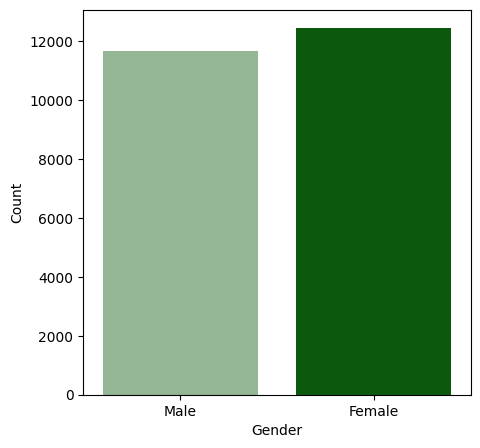

In [14]:
# Distribution of Gender
plt.figure(figsize=(5, 5))
sns.countplot(x='Gender', data=data, palette=['#8FBC8F', '#006400'])  # Light green for Male, Dark green for Female
# plt.title('Distribution of Gender')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

## 4. Age Distribution

The age distribution plot reveals a wide range of ages among participants, from young adults to the elderly. The distribution is somewhat *right-skewed*, indicating a larger representation of middle-aged and older adults. This skewness is relevant because the prevalence of conditions like hypertension and sleep apnea can increase with age. Moreover, understanding age distribution is essential for analyzing depression scores, as age can influence both the growth and reporting of depressive symptoms.

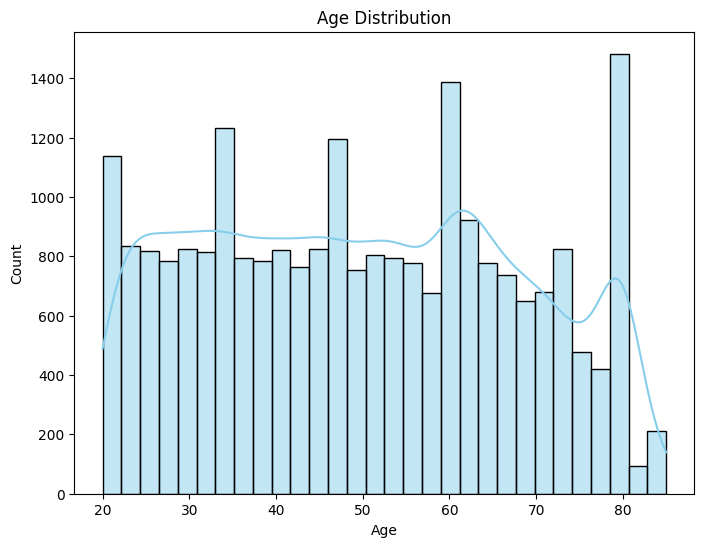

In [ ]:
# Age Distribution
plt.figure(figsize=(8, 6))
sns.histplot(x='Age', data=data, bins=30, kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

## 5. Depression Category Distribution

The distribution across depression categories shows that a significant majority of participants fall into the lowest category, indicating minimal depressive symptoms. However, there's still a notable number of individuals in the higher categories, representing moderate to severe depressive symptoms. This distribution highlights the importance of examining factors that may correlate with or contribute to higher depression scores, such as sleep apnea or hypertension.

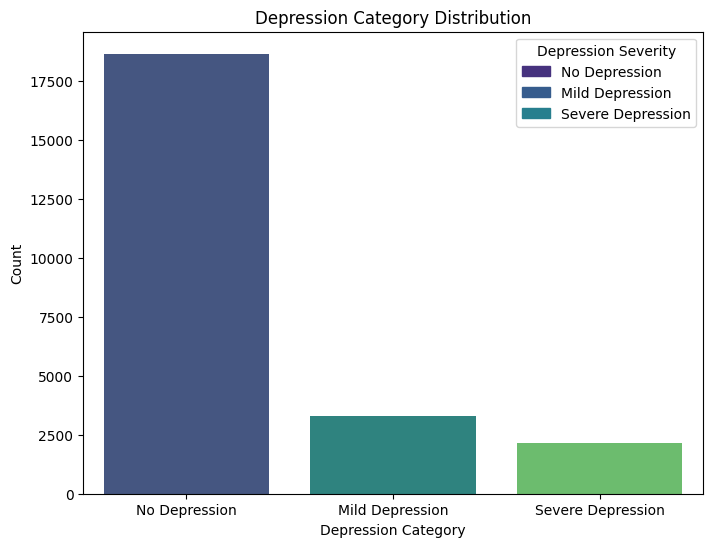

In [15]:
import warnings

# Ignoring future warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Adjusting the plot for Depression Category Distribution with legend for severity
plt.figure(figsize=(8, 6))
sns.countplot(x='depression_category', data=data, palette='viridis')
plt.title('Depression Category Distribution')
plt.xlabel('Depression Category')
plt.ylabel('Count')

# Adding custom legend to indicate severity of depression
severity_labels = ['No Depression', 'Mild Depression', 'Severe Depression']
handles = [plt.Rectangle((0,0),1,1, color=sns.color_palette('viridis')[i]) for i in range(len(severity_labels))]
plt.legend(handles, severity_labels, title='Depression Severity')

plt.show()

In [18]:
data

,Little_interest_in_doing_things,Feeling_down_or_depressed,Trouble_sleeping_or_sleeping_too_much,Feeling_tired_or_having_little_energy,Poor_appetite_or_overeating,Feeling_bad_about_yourself,Trouble_concentrating_on_things,Moving_or_speaking_slowly_or_too_fast,Thought_you_would_be_better_off_dead,No_of_hours_you_sleep,...,Gender,Age,Race,Education_Level,Marital_Status,Pregnant,PIR,depression_category,depression_category_encoded,depression_cat_norm
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,2,85,Non-Hispanic White,Some College/AA degree,Divorced/Widowed/Separated,0.0,1.99,No Depression,1,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,...,2,44,Non-Hispanic White,Some College/AA degree,Married/Living with Partner,0.0,4.65,No Depression,1,NaN
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,1,70,Non-Hispanic White,> College Graduate,Married/Living with Partner,0.0,5.00,No Depression,1,NaN
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,1,73,Non-Hispanic White,High School Graduate,Married/Living with Partner,0.0,2.15,No Depression,1,NaN
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,1,21,Non-Hispanic White,High School Graduate,Never Married,0.0,0.46,No Depression,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,...,1,52,Non-Hispanic Black,Some College/AA degree,Divorced/Widowed/Separated,0.0,5.00,No Depression,1,NaN
24104,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,8.0,...,2,67,Mexican American,9th-11th Grade,Married/Living with Partner,0.0,2.19,No Depression,1,NaN
24105,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,...,1,40,Non-Hispanic Black,> College Graduate,Married/Living with Partner,0.0,3.82,No Depression,1,NaN
24106,3.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,8.0,...,1,63,Non-Hispanic Black,9th-11th Grade,Divorced/Widowed/Separated,0.0,3.71,Mild Depression,0,NaN


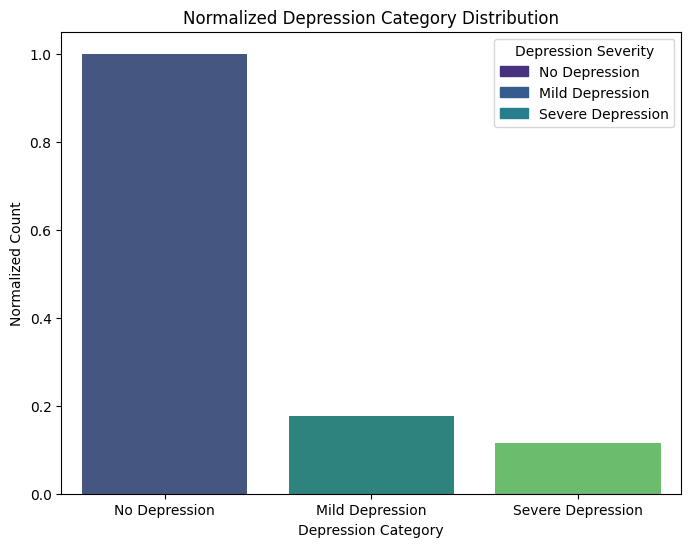

In [19]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate counts for each depression category
category_counts = data['depression_category'].value_counts()

# Find the maximum count among all categories
max_count = category_counts.max()

# Adjusting the plot for Depression Category Distribution with legend for severity
plt.figure(figsize=(8, 6))

# Calculate normalized counts for each category
normalized_counts = category_counts / max_count

# Plotting the normalized counts
sns.barplot(x=normalized_counts.index, y=normalized_counts.values, palette='viridis')

plt.title('Normalized Depression Category Distribution')
plt.xlabel('Depression Category')
plt.ylabel('Normalized Count')

# Adding custom legend to indicate severity of depression
severity_labels = ['No Depression', 'Mild Depression', 'Severe Depression']
handles = [plt.Rectangle((0,0),1,1, color=sns.color_palette('viridis')[i]) for i in range(len(severity_labels))]
plt.legend(handles, severity_labels, title='Depression Severity')

plt.show()


## 6. Distribution of Hours of Sleep

The distribution of sleep hours shows a concentration around 7-8 hours, aligning with the general recommendations for adult sleep duration. However, there are noticeable tails towards both shorter and longer sleep durations, suggesting variability in sleep patterns among the participants. This variability prompts further investigation into how deviations from recommended sleep durations are associated with depression, sleep apnea, and hypertension. Understanding sleep patterns is essential, as both insufficient and excessive sleep can have adverse effects on health.

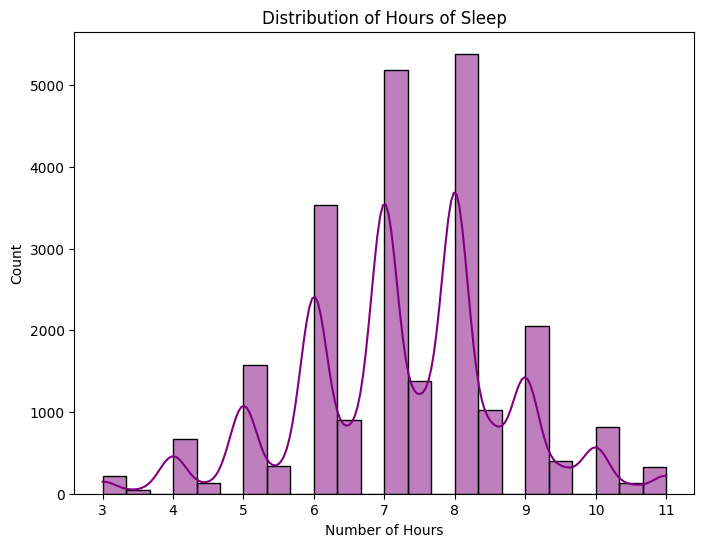

In [ ]:
# Distribution of Hours of Sleep
plt.figure(figsize=(8, 6))
sns.histplot(x='No_of_hours_you_sleep', data=data, bins=24, kde=True, color='purple')
plt.title('Distribution of Hours of Sleep')
plt.xlabel('Number of Hours')
plt.ylabel('Count')
plt.show()

## 7. Prevalence of Sleep Apnea

The prevalence of sleep apnea among participants is relatively low, with the majority reporting not having the condition. This finding is consistent with sleep apnea being a specific medical condition rather than a common characteristic of the general population. Despite its lower prevalence, sleep apnea's impact on sleep quality, mental health, and cardiovascular health makes it a critical area of study. The low prevalence also highlights the importance of analyzing how those with sleep apnea differ in terms of depression scores and hypertension indicators, given the condition's potential to significantly impact well-being.

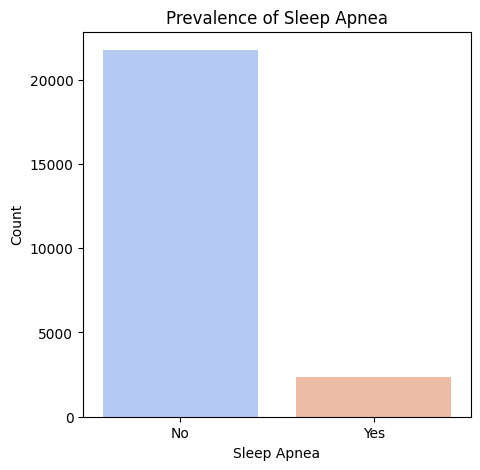

In [ ]:
# Prevalence of Sleep Apnea
plt.figure(figsize=(5, 5))
sns.countplot(x='Sleep_Apnea', data=data, palette='coolwarm')
plt.title('Prevalence of Sleep Apnea')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.xlabel('Sleep Apnea')
plt.ylabel('Count')
plt.show()

## 8. Age Distribution Across Depression Categories (Violin Plot)
The violin plot illustrates the age distribution within each depression category. It shows that while the age distribution is somewhat similar across categories, there might be a slightly wider spread in the "No Depression" and "Mild" categories, indicating a broader age range. The "Severe" category appears to have a more concentrated age distribution, possibly suggesting specific age groups may be more prone to severe depression symptoms.

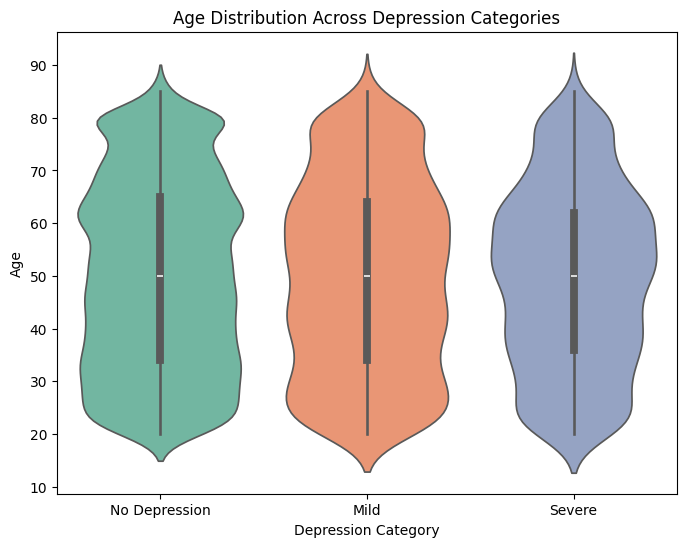

In [ ]:
# Violin Plot: Age Distribution Across Depression Categories
plt.figure(figsize=(8, 6))
sns.violinplot(x='depression_category', y='Age', data=data, palette='Set2')
plt.title('Age Distribution Across Depression Categories')
plt.xlabel('Depression Category')
plt.ylabel('Age')
plt.xticks(ticks=[0, 1, 2], labels=['No Depression', 'Mild', 'Severe'])
plt.show()

## 9. Relationship Between Age and Hours of Sleep (Joint Plot)

This plot examines the relationship between age and the number of hours slept, with a regression line suggesting the trend.

Key observations include:

* Trend: The regression line indicates a slight negative trend, suggesting that as age increases, the average number of hours slept may decrease slightly.
* Variability: There is considerable variability in sleep hours across all ages, highlighting individual differences in sleep patterns.
* Concentration: The densest concentration of points occurs around the recommended 7-9 hours of sleep, across a wide range of ages.

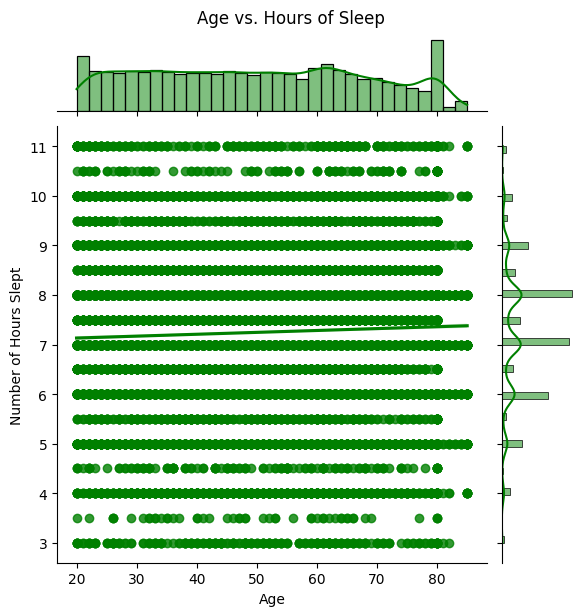

In [ ]:
# Joint Plot: Relationship Between Age and Hours of Sleep
sns.jointplot(x='Age', y='No_of_hours_you_sleep', data=data, kind='reg', color='green')
plt.suptitle('Age vs. Hours of Sleep', y=1.02)
plt.xlabel('Age')
plt.ylabel('Number of Hours Slept')
plt.show()

## 10. Hours of Sleep by Depression Category (Box Plot)

This box plot illustrates how sleep duration varies across different depression categories, showing:

* Similar Median Sleep Hours: The median number of sleep hours appears relatively consistent across depression categories, suggesting that average sleep duration might not drastically differ by depression severity.
* Variability and Outliers: There's noticeable variability in sleep hours within each category, especially with outliers indicating significantly shorter or longer sleep durations. This variability might reflect the complex relationship between sleep and depression.
* Slight Differences in Distribution: While the medians are similar, the distribution and range of sleep hours show some differences. For example, the "Severe" depression category appears to have a slightly broader interquartile range, suggesting greater variability in sleep patterns among individuals with severe depression.

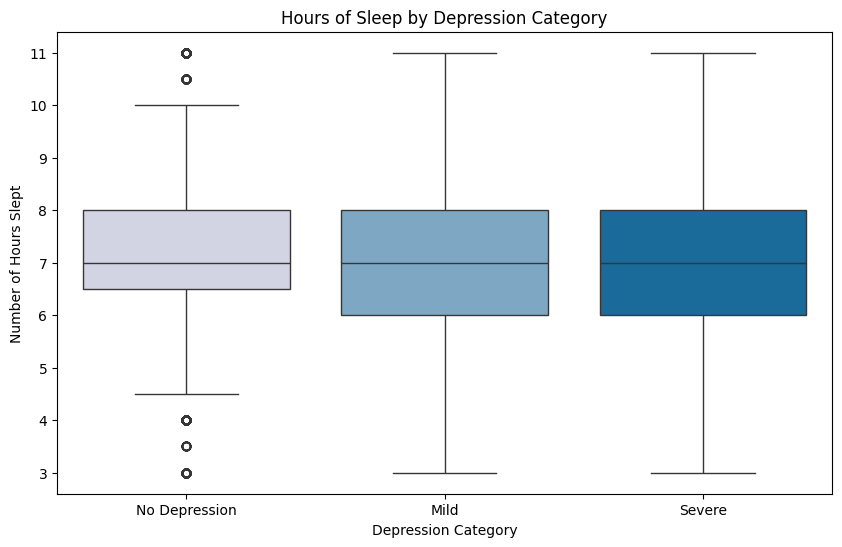

In [ ]:
# Box Plot: Hours of Sleep by Depression Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='depression_category', y='No_of_hours_you_sleep', data=data, palette='PuBu')
plt.title('Hours of Sleep by Depression Category')
plt.xlabel('Depression Category')
plt.ylabel('Number of Hours Slept')
plt.xticks(ticks=[0, 1, 2], labels=['No Depression', 'Mild', 'Severe'])
plt.show()

## 11. Line Plot: Average Blood Pressure by Age

The line plot showing the trend of average blood pressure over different ages provides clear insights:

* Increasing Trend: There's a noticeable increasing trend in average blood pressure with age. This pattern is consistent with general medical knowledge that blood pressure tends to rise as people get older.
* Variations: While the overall trend is increasing, there are age ranges where the average blood pressure plateaus or even dips slightly before continuing its upward trajectory. This could reflect natural variations in population health or the impact of lifestyle and medical interventions.
* Focus on Older Ages: The increase in average blood pressure becomes more pronounced in the older age groups, highlighting the importance of monitoring and managing blood pressure as part of aging healthily.

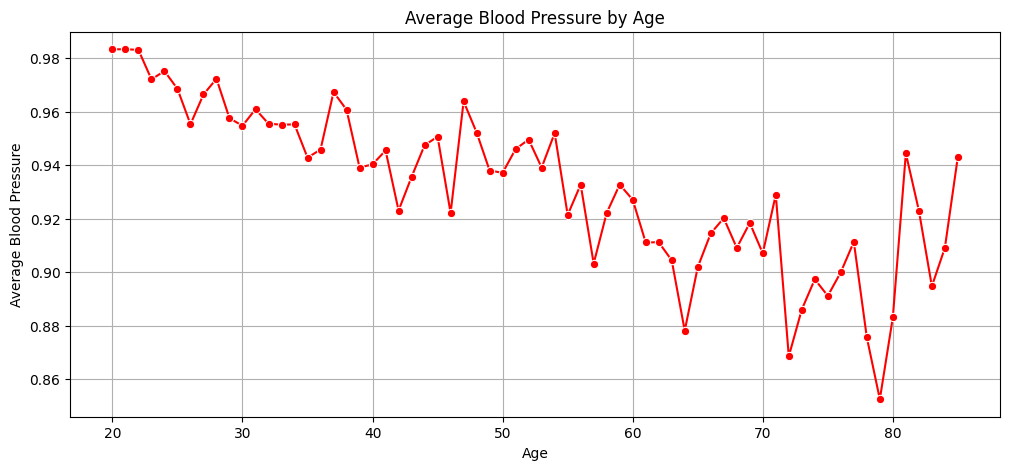

In [ ]:
# Line Plot: Average Blood Pressure by Age
avg_bp_by_age = data.groupby('Age')['Blood_pressure'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='Age', y='Blood_pressure', data=avg_bp_by_age, color='red', marker='o')
plt.title('Average Blood Pressure by Age')
plt.xlabel('Age')
plt.ylabel('Average Blood Pressure')
plt.grid(True)
plt.show()

## 12. Depression vs Sleep Apnea

If respondents were diagnosed with sleep apnea problems, it does not necessarily mean they will have depression as shown in Figure. The respondents without sleep apnea problems could still suffer from depression.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
# Compute the count of "No depression" category
no_depression_count = data[data['depression_category'] == 'No depression']['Sleep_Apnea'].count()

# Plotting
plt.figure(figsize=(6,4))
# Normalizing count plot by dividing counts by the count of 'No depression'
sns.countplot(data=data, x='Sleep_Apnea', hue='depression_category', palette='muted',
              weights=[1/no_depression_count if category != 'No depression' else 1 for category in data['depression_category']])

# Set labels and title
plt.xlabel('Sleep Apnea')
plt.ylabel('Count')
plt.title('Depression Category by Sleep Apnea')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Show the plot
plt.legend(title='Depression Category',labels=['No Depression', 'Mild', 'Severe'])
plt.show()

NameError: name 'data' is not defined

## 13. Depression vs Hypertension

While there is a connection between high blood pressure and depression, they don't always occur together. Some people have high blood pressure without depression, and some people have depression without high blood pressure.

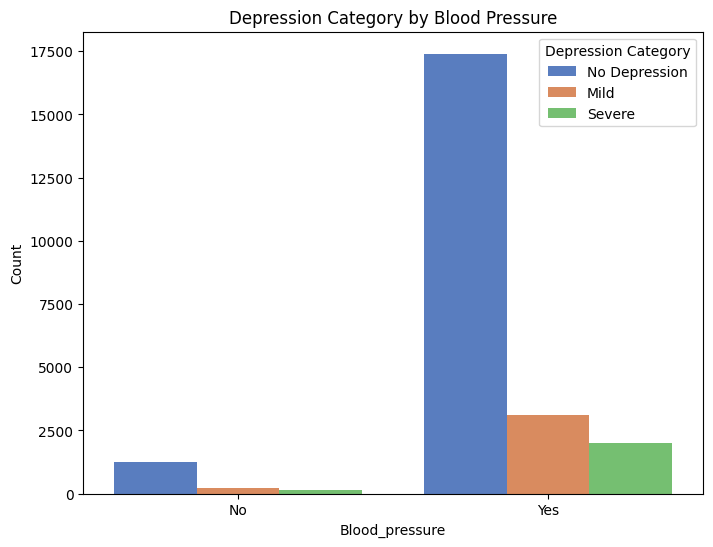

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plotting
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Blood_pressure', hue='depression_category', palette='muted')

# Set labels and title
plt.xlabel('Blood_pressure')
plt.ylabel('Count')
plt.title('Depression Category by Blood Pressure')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

# Show the plot
plt.legend(title='Depression Category',labels=['No Depression', 'Mild', 'Severe'])
plt.show()


### 14. Depression vs Age

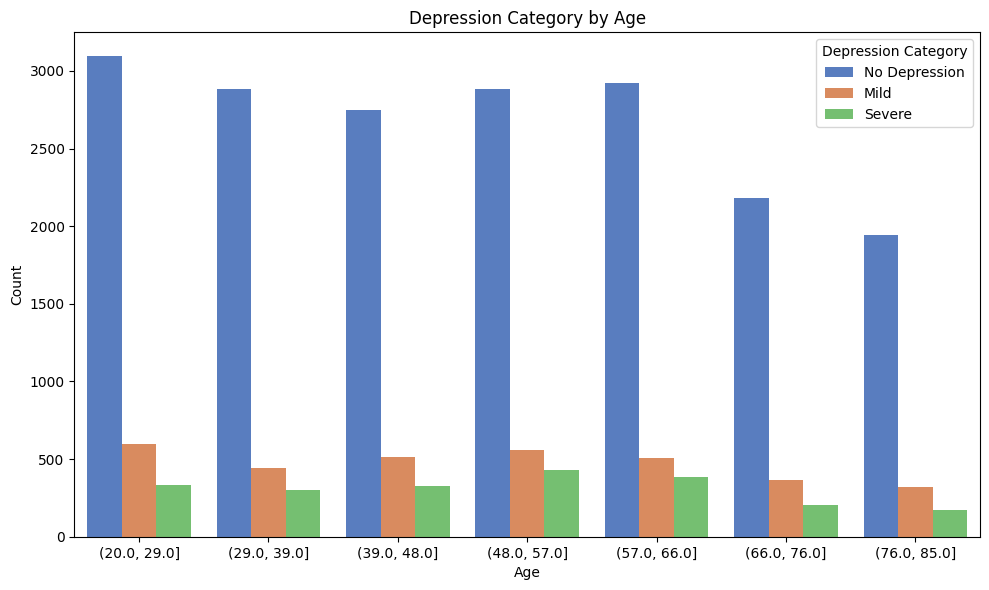

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the number of bins and bin edges
num_bins = 7
bin_edges = pd.cut(data['Age'], bins=num_bins, precision=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x=bin_edges, hue='depression_category', palette='muted')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Depression Category by Age')

# Show the plot
plt.legend(title='Depression Category', labels=['No Depression', 'Mild', 'Severe'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### 15. Depression Vs Gender

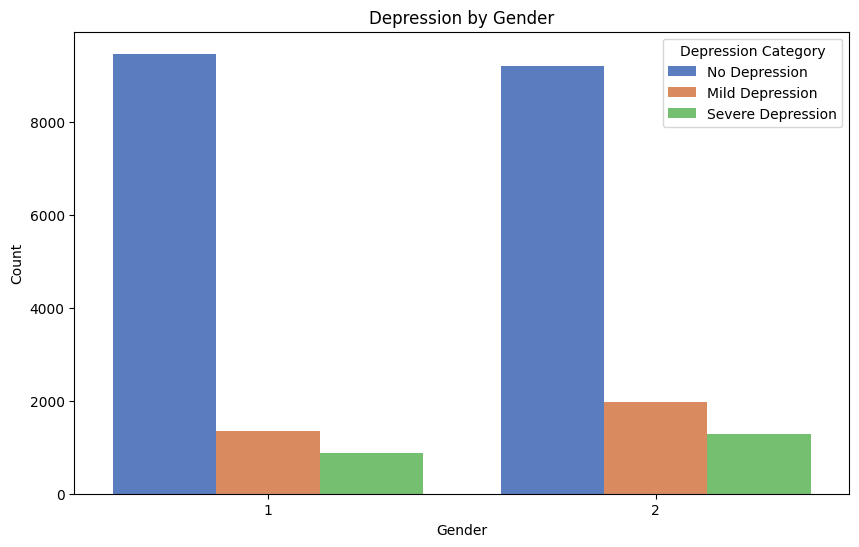

In [ ]:
# Plot depression by gender
plt.figure(figsize=(10,6))
sns.countplot(data=data, x='Gender', hue='depression_category', palette='muted')
# Set labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Depression by Gender')
# Show the plot
plt.legend(title='Depression Category')
plt.show()

**1. Depression Category '0' (No Depression):** Both males and females have the highest counts in this category, indicating that within the population sampled, individuals with no depression are the majority.

**2. Depression Category '1' (Mild/Moderate Depression)**: For mild to moderate depression, the count for females is higher than that for males, suggesting that mild/moderate depression is more prevalent among females in the population sampled.

**3. Depression Category '2' (Severe Depression)**: In the severe depression category, the trend continues with females having a higher count than males, suggesting that severe depression is also more prevalent among females within this data set.

**4. Overall Prevalence of Depression**: Across all categories of depression, females have higher counts than males. This might suggest that in the sampled population, depression is more commonly reported or diagnosed in females than in males.

**5. Possible Implications:** If the sample is representative of a larger population, these findings could suggest a need for gender-specific mental health resources and interventions, with a potential focus on addressing depression among females.

### 16. Depression vs Education Level

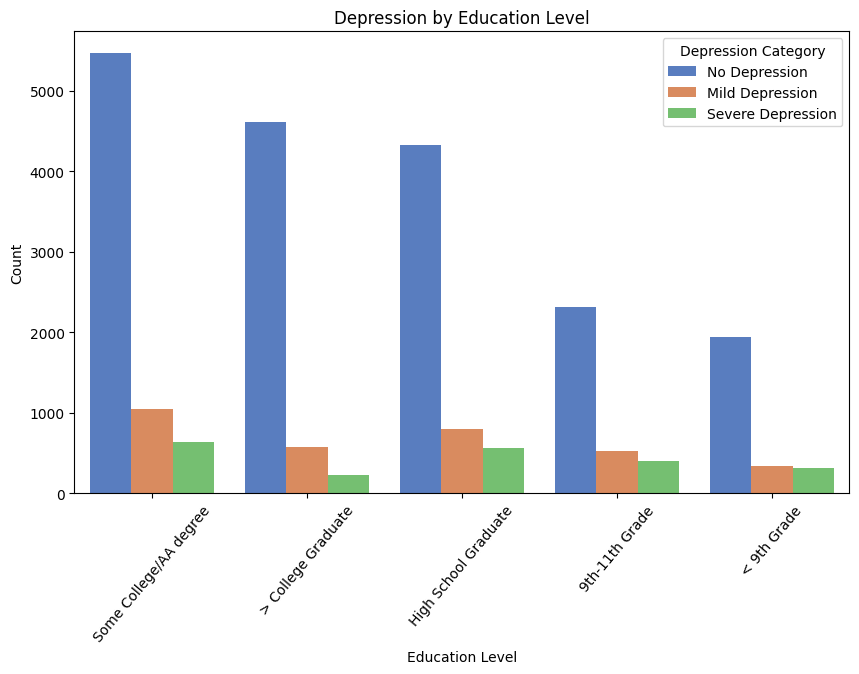

In [ ]:
# Plot depression by education level
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Education_Level', hue='depression_category', palette='muted')

# Set labels and title
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Depression by Education Level')
plt.xticks(rotation=50)
# Show the plot
plt.legend(title='Depression Category')
plt.show()

**1. Higher Education, Higher Counts of No Depression:** Education level '3' has the highest count of individuals with no depression (category '0'), followed by education level '4'. This might suggest a correlation between higher education levels and lower incidence of depression, though causation cannot be inferred from this chart alone.

**2. Lowest Education, Lower Counts of No Depression**: Education level '0' shows the lowest count of individuals with no depression. This could indicate that lower education levels might be associated with higher depression rates, but again, this is a correlation and does not imply causation.

**3. Depression Counts Across Education Levels**: For education levels '1' and '2', the counts of individuals with no depression are comparable but still lower than those for education levels '3' and '4'.

**4. Mild/Moderate Depression (Category '1'):** Education level '2' has the highest count of mild/moderate depression, followed by education level '3'. This pattern is not as straightforward as with no depression, suggesting that the relationship between education and mild/moderate depression may not be linear or may be influenced by other factors.

**5. Severe Depression (Category '2')**: The count of individuals with severe depression is the lowest across all education levels, indicating that severe depression is less common in the population sampled. However, the highest count of severe depression is at education level '2', which might suggest a particular stressor or factor associated with this education level that could be influencing mental health.

**6. Specific Trends and Implications**: At the highest education level '4', the counts for both mild/moderate and severe depression are relatively low compared to no depression. This could be interpreted as an indication that higher education levels may have protective factors against depression or that individuals with higher education have better access to resources for managing depression.

### 17. Depression vs Race

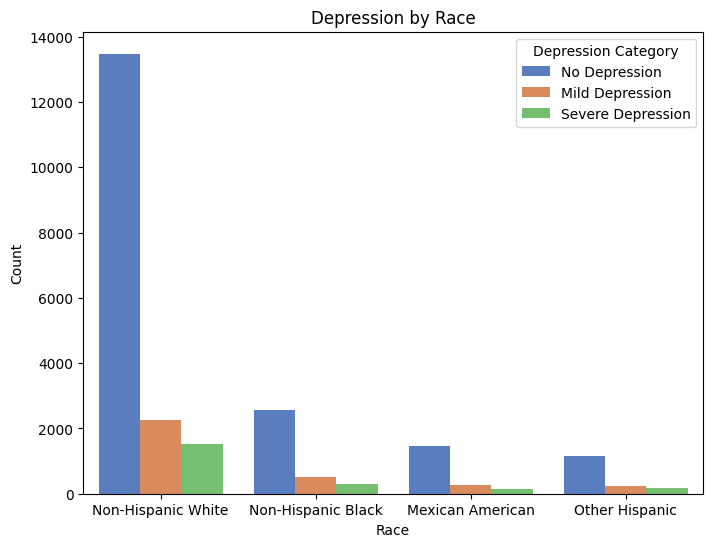

In [ ]:
# Plot depression by race
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Race', hue='depression_category', palette='muted')

# Set labels and title
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Depression by Race')

# Show the plot
plt.legend(title='Depression Category')
plt.show()

**1. Distribution by Race**: The count of individuals in the 'No Depression' category is highest among Non-Hispanic Whites, followed by Mexican Americans, Non-Hispanic Blacks, and Other Hispanics. This indicates that within this dataset, Non-Hispanic Whites have the largest number of individuals with no reported depression.

**2. Mild Depression**: Non-Hispanic Blacks have a higher count of mild depression compared to Mexican Americans and Other Hispanics. However, all minority groups have lower counts of mild depression compared to Non-Hispanic Whites.

**3. Severe Depression**: Non-Hispanic Whites also have the highest count of severe depression, followed by Non-Hispanic Blacks, Other Hispanics, and Mexican Americans.

**4. Proportional Analysis**: While the Non-Hispanic White group has the highest count in all categories, this may reflect a larger population size within the dataset rather than a higher rate of depression.

**5. Depression Severity in Minority Groups**: The Non-Hispanic Black group shows a closer count between mild and severe depression compared to the other groups. This could suggest different stressors or vulnerabilities within this community, or it could reflect how depression manifests and is reported among this group.

**6. Other Hispanics**: The 'Other Hispanic' category has the lowest count across all levels of depression, which could be due to a smaller population size within the dataset or lower rates of depression diagnosis or reporting.

**7. Cultural Factors and Implications**: It's important to consider cultural factors that might influence the reporting and diagnosis of depression, such as stigma or access to healthcare, which can vary across different racial groups.If these trends are representative of a larger population, they might have implications for targeted mental health interventions in different racial communities.

### 18. Marriage Status vs Depression

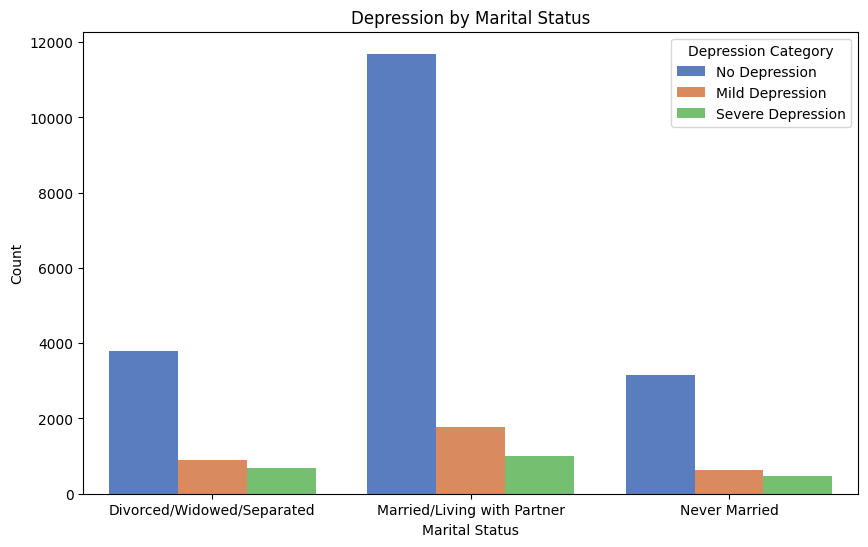

In [ ]:
# Plot depression by marital status
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Marital_Status', hue='depression_category', palette='muted')

# Set labels and title
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.title('Depression by Marital Status')

# Show the plot
plt.legend(title='Depression Category')
plt.show()

**1. Marital Status with Highest No Depression Count**: Individuals who are Married/Living with Partner have the highest count of individuals in the 'No Depression' category, significantly more than the other two categories. This might suggest a potential protective effect of marriage or cohabitation against depression, or it could be reflective of social support systems that are often associated with partnered life.

**2. Marital Status with Highest Depression Counts**: Individuals who are Divorced/Widowed/Separated have higher counts of both mild and severe depression compared to those who are Married/Living with Partner or Never Married. This could be indicative of the psychological and emotional impact of marital separation, widowhood, or divorce on mental health.

**3. Never Married Individuals**: The 'Never Married' category has a lower count of individuals with no depression compared to the Married/Living with Partner category. However, they also have lower counts of mild and severe depression compared to the Divorced/Widowed/Separated category.

**4. Severity of Depression by Marital Status**: While the Married/Living with Partner group has the highest overall count in the no depression category, they also have a notable count in the mild and severe depression categories. The Divorced/Widowed/Separated group shows a prominent number of individuals with severe depression, which could warrant further investigation into the mental health support systems available to individuals following the dissolution of a marriage.

**5. Social Support and Depression**: The data may hint at the role of social support in mental health. Being Married/Living with Partner typically means more regular social and emotional support, which might be protective against depression.